In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

# **Data loading, data exploration and visual analysis**

In [3]:
URL = "/kaggle/input/aviakompaniya/train_dataset.csv"
df = pd.read_csv(URL , index_col='id')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [5]:
df.shape

(10000, 23)

In [6]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [7]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [8]:
df.drop(['Type of Travel','Class','Customer Type','Gender'],axis=1).corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [9]:
pd.DataFrame(df['Class'].value_counts())

,count
Class,
Business,5048
Eco,4251
Eco Plus,701


In [10]:
pd.DataFrame(df['Type of Travel'].value_counts())

,count
Type of Travel,
Business travel,7079
Personal Travel,2921


In [11]:
pd.DataFrame(df['Customer Type'].value_counts())

,count
Customer Type,
Loyal Customer,8307
disloyal Customer,1693


In [12]:
pd.DataFrame(df['Gender'].value_counts())

,count
Gender,
Female,5169
Male,4831


In [13]:
pd.DataFrame(df['satisfaction'].value_counts())

,count
satisfaction,
0,5000
1,5000


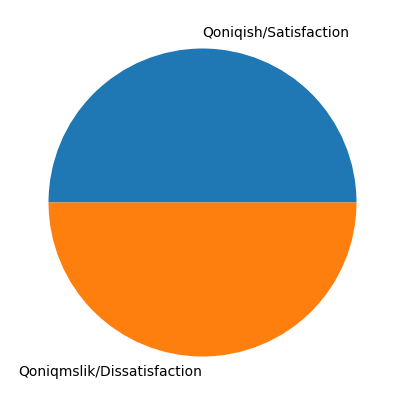

In [14]:
churn_rate = df['satisfaction'].value_counts()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qoniqish/Satisfaction','Qoniqmslik/Dissatisfaction'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


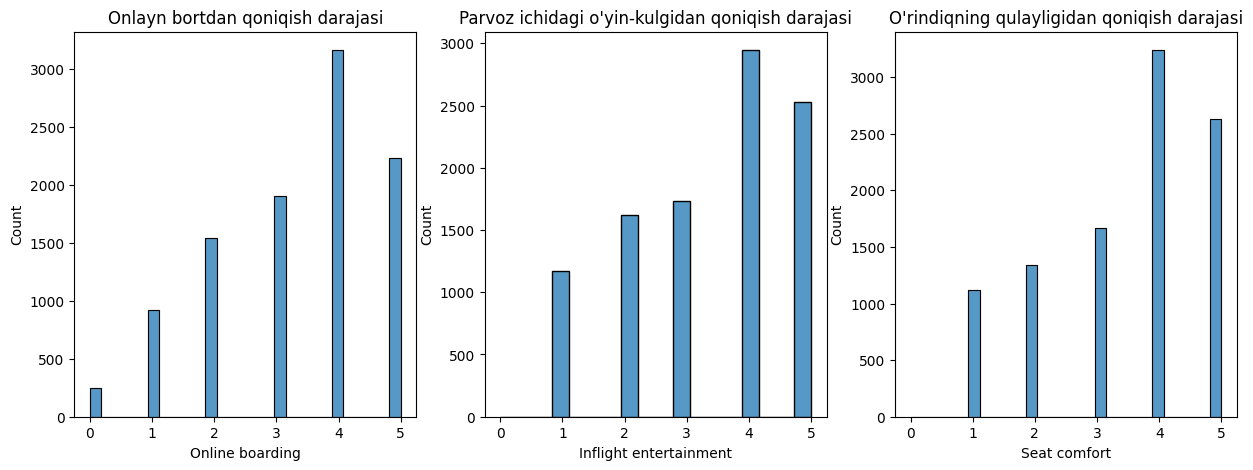

In [15]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Online boarding
sns.histplot(x="Online boarding", data=df, ax=axes[0])
axes[0].set_title("Onlayn bortdan qoniqish darajasi")

#Inflight entertainment
sns.histplot(x="Inflight entertainment", data=df, ax=axes[1])
axes[1].set_title("Parvoz ichidagi o'yin-kulgidan qoniqish darajasi")

# Seat comfort
sns.histplot(x="Seat comfort", data=df, ax=axes[2])
axes[2].set_title("O'rindiqning qulayligidan qoniqish darajasi")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


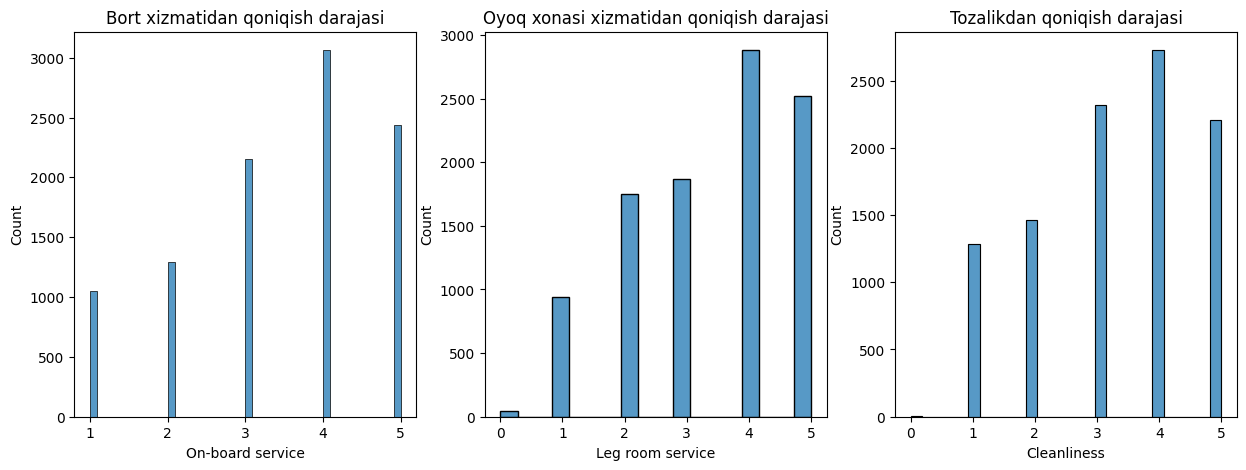

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# On-board service
sns.histplot(x="On-board service", data=df, ax=axes[0])
axes[0].set_title("Bort xizmatidan qoniqish darajasi")

# Leg room service
sns.histplot(x="Leg room service", data=df, ax=axes[1])
axes[1].set_title("Oyoq xonasi xizmatidan qoniqish darajasi")

# Cleanliness
sns.histplot(x="Cleanliness", data=df, ax=axes[2])
axes[2].set_title("Tozalikdan qoniqish darajasi")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


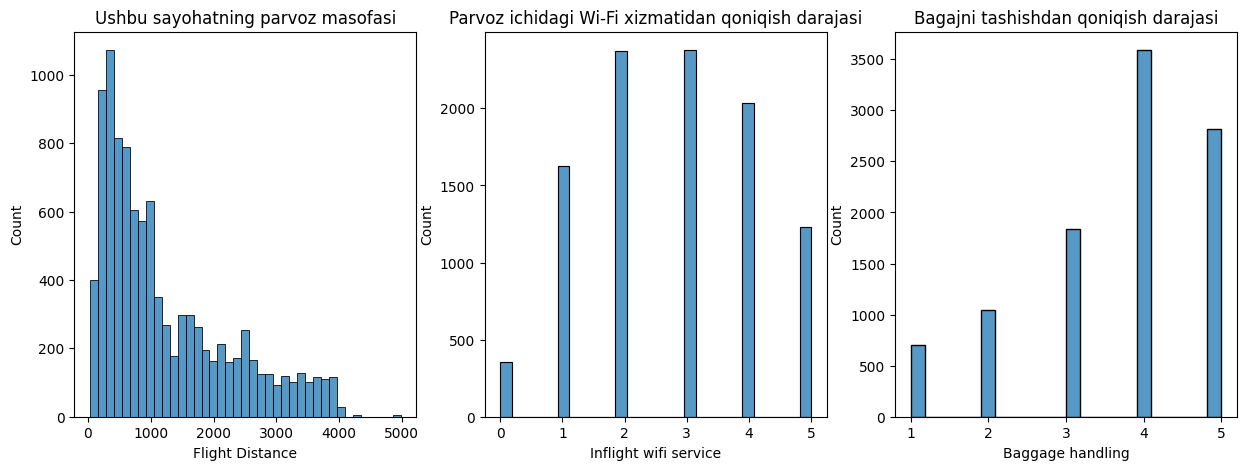

In [17]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Flight Distance
sns.histplot(x="Flight Distance", data=df, ax=axes[0])
axes[0].set_title("Ushbu sayohatning parvoz masofasi")

# Inflight wifi service
sns.histplot(x="Inflight wifi service", data=df, ax=axes[1])
axes[1].set_title("Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi")

# Baggage handling
sns.histplot(x="Baggage handling", data=df, ax=axes[2])
axes[2].set_title("Bagajni tashishdan qoniqish darajasi")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


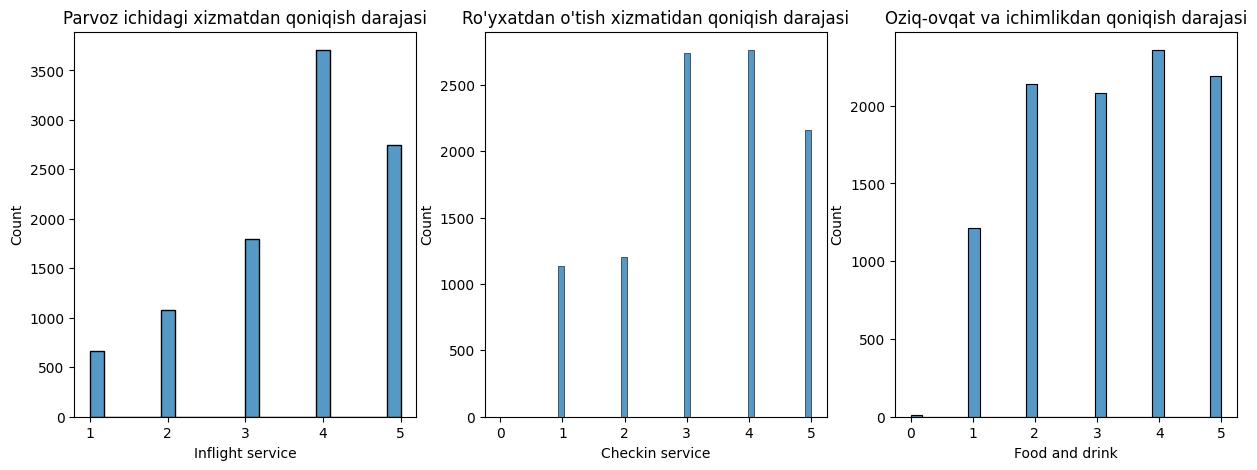

In [18]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Inflight service
sns.histplot(x="Inflight service", data=df, ax=axes[0])
axes[0].set_title("Parvoz ichidagi xizmatdan qoniqish darajasi")

# Checkin service
sns.histplot(x="Checkin service", data=df, ax=axes[1])
axes[1].set_title("Ro'yxatdan o'tish xizmatidan qoniqish darajasi")

# Food and drink
sns.histplot(x="Food and drink", data=df, ax=axes[2])
axes[2].set_title("Oziq-ovqat va ichimlikdan qoniqish darajasi")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


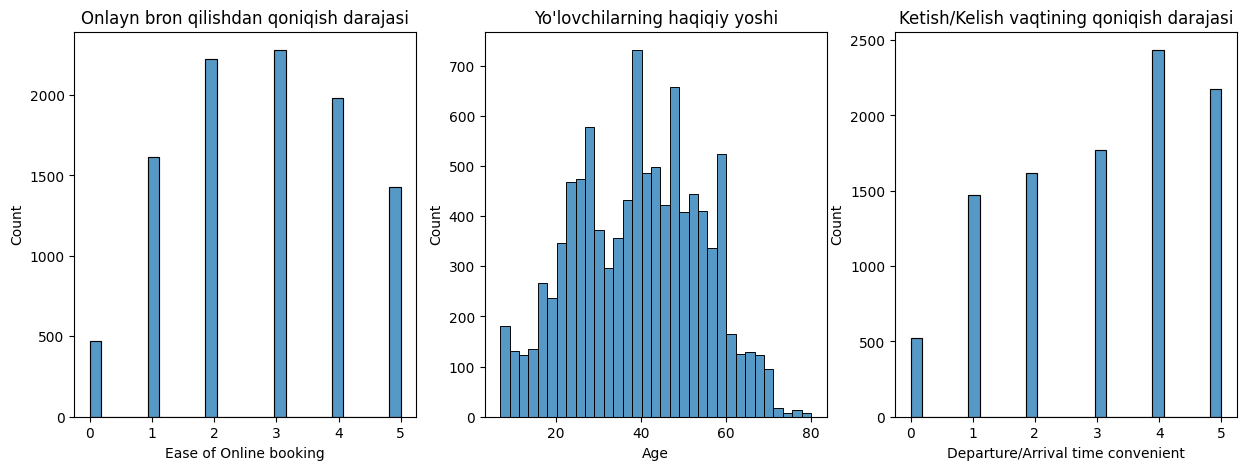

In [19]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Ease of Online booking
sns.histplot(x="Ease of Online booking", data=df, ax=axes[0])
axes[0].set_title("Onlayn bron qilishdan qoniqish darajasi")

# Age
sns.histplot(x="Age", data=df, ax=axes[1])
axes[1].set_title("Yo'lovchilarning haqiqiy yoshi")

# Departure/Arrival time convenient
sns.histplot(x="Departure/Arrival time convenient", data=df, ax=axes[2])
axes[2].set_title("Ketish/Kelish vaqtining qoniqish darajasi")

plt.show()

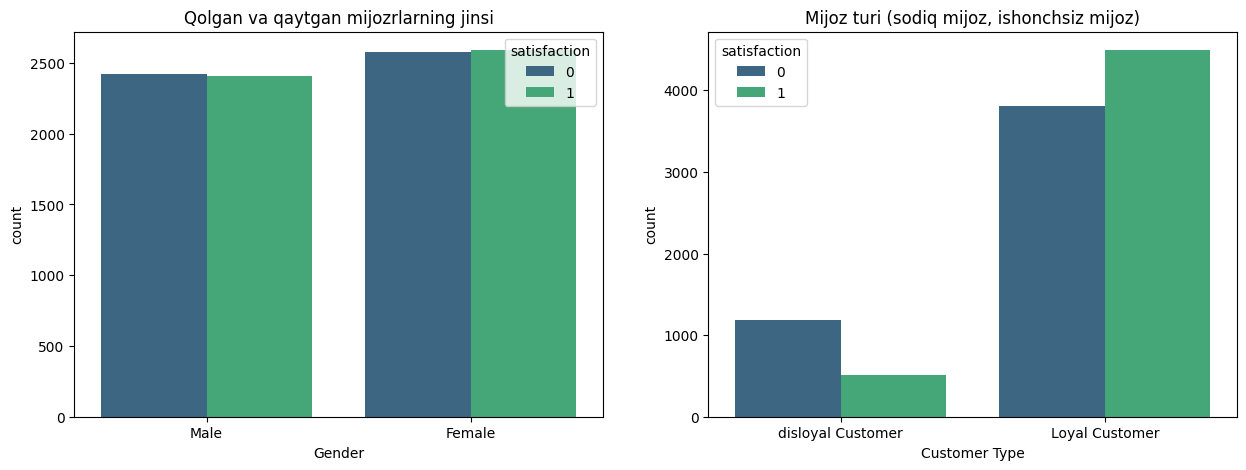

In [20]:
df1 = df.copy()
df1['satisfaction'] = df1['satisfaction'].astype(str)

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df1, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df1, ax=axes[1])
axes[1].set_title("Mijoz turi (sodiq mijoz, ishonchsiz mijoz)")

plt.show()


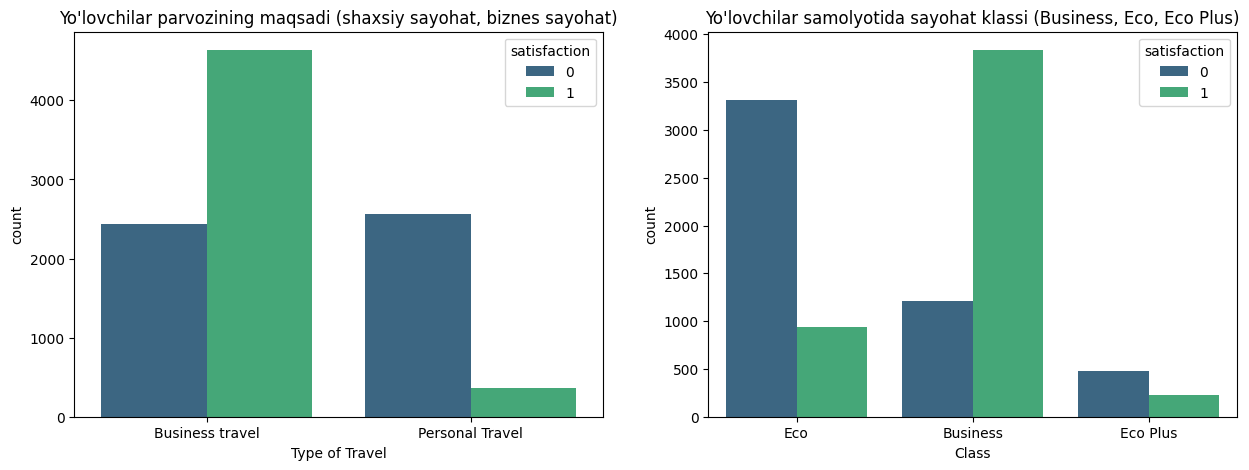

In [21]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df1, ax=axes[0])
axes[0].set_title("Yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df1, ax=axes[1])
axes[1].set_title("Yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)")

plt.show()


# **Machine Learning data preparation**

In [22]:
data = df.copy()

In [23]:
data.dropna(inplace=True)

In [24]:
encoded = pd.get_dummies(data)
encoded = encoded.astype(int)

X = encoded.drop("satisfaction", axis=1)
y = encoded['satisfaction']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=18)

# **Train the RandomForestClassifier model**

Model ROC AUC: 0.9821842061657522


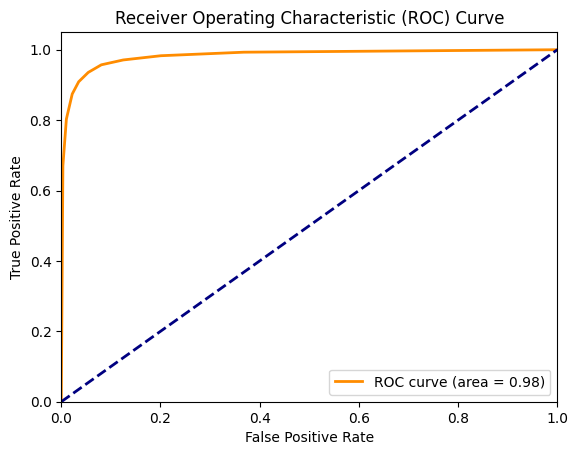

In [25]:
# Train the RF model
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)
# Model evaluation using cross-validation
y_scores_cv = cross_val_predict(RF_model, X_train, y_train, cv=10, method='predict_proba')

# Extract the probabilities of the positive class for each fold
y_scores = y_scores_cv[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Print ROC AUC
print("Model ROC AUC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Train the XGBClassifier model**

Model ROC AUC: 0.9917690524569446


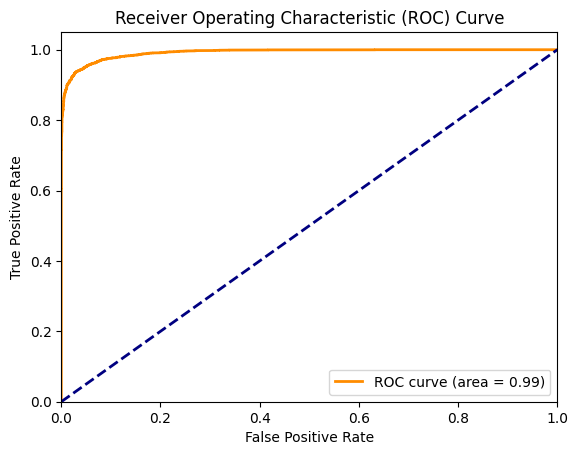

In [26]:
# Train the XGB model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Model evaluation using cross-validation
y_scores_cv = cross_val_predict(xgb_model, X_train, y_train, cv=10, method='predict_proba')

# Extract the probabilities of the positive class for each fold
y_scores = y_scores_cv[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Print ROC AUC
print("Model ROC AUC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Train the KNeighborsClassifier model**

Model ROC AUC: 0.9574566328717917


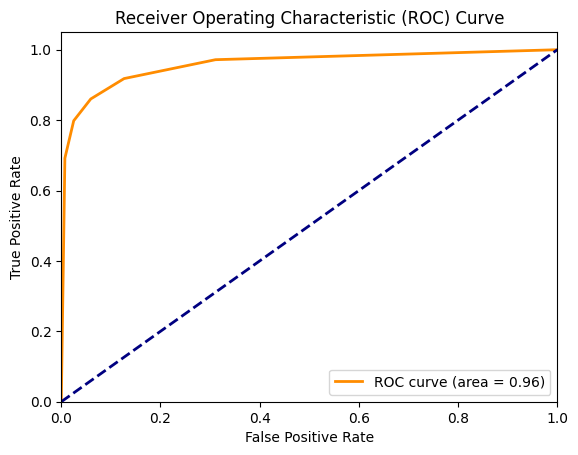

In [27]:
# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model evaluation using cross-validation
y_scores_cv = cross_val_predict(knn_model, X_train, y_train, cv=10, method='predict_proba')

# Extract the probabilities of the positive class for each fold
y_scores = y_scores_cv[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Print ROC AUC
print("Model ROC AUC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [28]:
URL = "/kaggle/input/aviakompaniya/test_dataset.csv"
df_test = pd.read_csv(URL , index_col='id')
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [29]:
data_test = df_test.copy()

data_test.dropna(inplace=True)

encoded_test = pd.get_dummies(data_test)
encoded_test = encoded_test.astype(int)

In [30]:
Y_test_pred = xgb_model.predict(encoded_test)
Y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
y_result = data_test
y_result['satisfaction'] = Y_test_pred
y_result = y_result["satisfaction"]

In [32]:
y_result.to_csv('sub.csv',index=False)